# The Gradient Descent algorithm

We will use our knowledge of python programming to build a set of _metaheuristic_ solvers. We will start with very simple examples and work our way up to the Gradient Descent algorithm. This algorithm is very widely used in data science, including in the field of deep learning.

A very gentle and readable introduction to this and other interesting algorithms can be found in the book "Essentials of Metaheuristics," available for free at: https://cs.gmu.edu/~sean/book/metaheuristics/

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns



In [2]:
%matplotlib inline
#sns.set(style="darkgrid", rc={'figure.figsize':(15,8)})
figs = (15,8)


## Try a range of values to find an exact answer

#### Try all values in order to find exact answer
In an earlier lecture, we wrote some code to **solve the equation** `250 = 5 * x`. Although it wasn't made explicit in that example, the variable `x` can only take on integer values. We found that setting `x` equal to 50 gets us the answer we need. In that scenario, we knew that there _was_ an exact answer.

In [3]:
max_guess_value = 250 # 250 is arbitrary, we could have picked 1000 or 100, as long as we are sure the guess is below this number

for guess in range(max_guess_value):
    if 5 * guess == 250:
        print("x = ", guess)
        break

x =  50


## Hill climbing: try a range of values to find the _best_ answer

Let's change the problem slightly: `251 = 5 * x`. Now there is no exact integer answer. We have to estimate an answer with as low an error as possible. 

We are no longer trying to _solve_ an equation, we are trying to **optmize** the error of the equation.

When we were looking for the value which gets us the exact answer, we could end the search as soon as the correct value was found. This time, we are trying to minimize the error. We make a guess, calculate its result, compare the quality of the result to what we have calculated before.

_Note_ : We are introducing the concept of error functions and keeping track of best guesses in a loop. Otherwise there are better (and slightly more complicated) ways of solving this.

In [4]:
best_error = None
best_guess = None

max_guess_value = 251 # 251 is arbitrary, we could have picked 1000 or 100, as long as we are sure the guess is below this number


for guess in range(max_guess_value):
    result = 5 * guess
    error  = abs(251 - result)
    
    if best_guess is None or error < best_error:
      best_guess = guess
      best_error = error

best_guess, best_error

(50, 1)

**Add visulization code**

In [5]:
best_error = None
best_guess = None

guesses_errors = list() # store errors and guesses to visualize

for guess in range(251):
    result = 5 * guess
    error  = abs(251 - result)
    
    guesses_errors.append((guess, error)) # store errors and guesses to visualize
    
    if best_guess is None or error < best_error:
      best_guess = guess
      best_error = error

best_guess, best_error

(50, 1)

In [6]:
guesses_errors_df = pd.DataFrame(guesses_errors, columns=["guess", "error"])

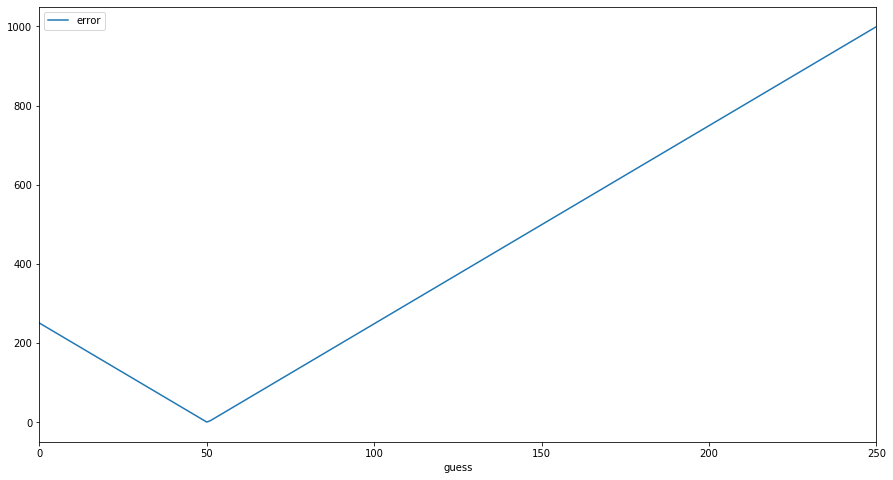

In [7]:
#plt.scatter([x[0] for x in guesses_errors], [x[1] for x in guesses_errors])
#sns.lineplot(x="guess", y="error", data=guesses_errors_df);
pd.DataFrame(guesses_errors_df, columns=["guess", "error"]).plot.line(x="guess", y="error", figsize=figs)

**Separate concerns**

Notice that the code for the equation `251 = 5 * x` is mixed in with the code which searches for the solution. Let's write it again and separate out the two concerns:

In [36]:
def eqn(x): return 5 * x

def opt_hill_climb_int(equation, target, guess_min=-1000, guess_max=1000, return_intermediate_vals=False):
    best_error = None
    best_guess = None
    
    guesses_errors = list() # store errors and guesses to visualize

    for g in range(guess_min, guess_max):
        result = equation(g)
        error  = abs(target - result)
        
        guesses_errors.append((g, error)) # store errors and guesses to visualize
        
        if best_guess is None or error < best_error:
            best_guess = g
            best_error = error
    if return_intermediate_vals:
        return best_guess, best_error, guesses_errors
    else:
        return best_guess, best_error, None

If we were being honest, we would have to admit that the code for searching for a solution is mixed up with code to record our guesses, so they can be visualized later.

In [9]:
opt_hill_climb_int(eqn, 251)

(50, 1, None)

In [10]:
opt_hill_climb_int(eqn, 250)

(50, 0, None)

In [11]:
opt_hill_climb_int(lambda x: x * 25, 250)

(10, 0, None)

In [12]:
opt_hill_climb_int(lambda x: x * 25, 50000) # Why is the error so large?

(999, 25025, None)

In [13]:
opt_hill_climb_int(lambda x: x * 25, 50000, guess_max=3000)

(2000, 0, None)

Same result, but with a chart to show how we arrived at the guess

50 1


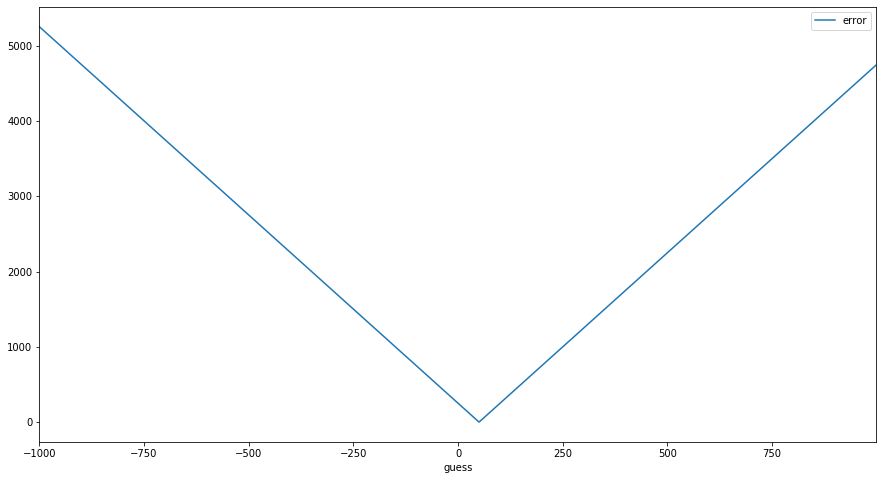

In [14]:
best_guess, best_error, guesses = opt_hill_climb_int(eqn, 251, return_intermediate_vals=True)

print(best_guess, best_error, len(guesses))
pd.DataFrame(guesses, columns=["guess", "error"]).plot.line(x="guess", y="error",figsize=figs)

50 0


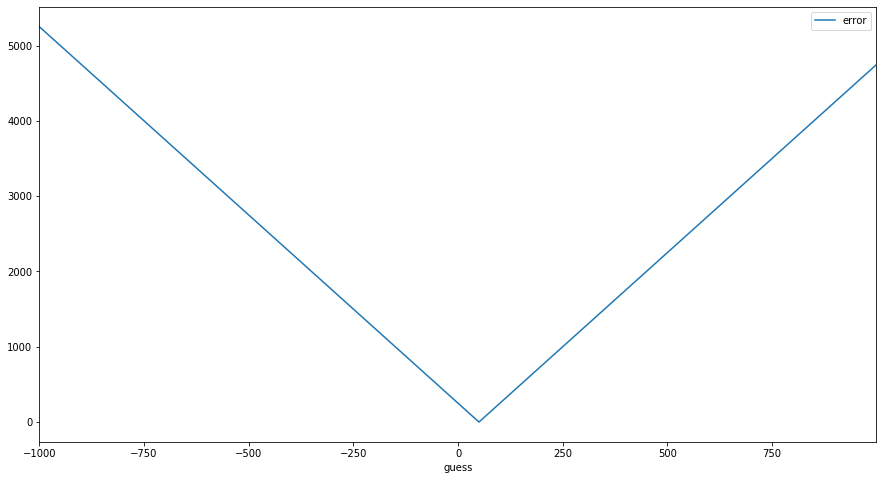

In [15]:
best_guess, best_error, guesses = opt_hill_climb_int(eqn, 250, return_intermediate_vals=True)

print(best_guess, best_error, len(guesses))
pd.DataFrame(guesses, columns=["guess", "error"]).plot.line(x="guess", y="error",figsize=figs)

2000 0


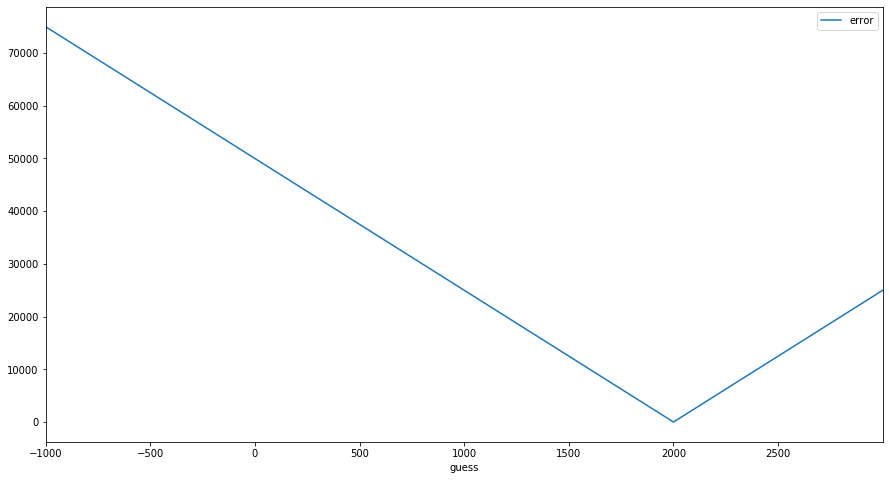

In [20]:
best_guess, best_error, guesses = opt_hill_climb_int(lambda x: x * 25, 50000, guess_max=3000, return_intermediate_vals=True)

print(best_guess, best_error, len(guesses))
pd.DataFrame(guesses, columns=["guess", "error"]).plot.line(x="guess", y="error",figsize=figs)

**Exercise** Find the best value for ` 1234 = 567 * x` (solve for x) using the `opt_hill_climb_int` function

### Solving for a set of points, rather than a single equation

Recall our running example: `251 = 5 * x`. It is more realistic that you will have a set of data points, rather than an equation. For example, you might be asked to find the parameter which links these numbers:

| x | y |
|---|---|
| 1 | 5.2|
| 2 | 10.2|
| 3 | 15.05|
| 4 | 20.1|
| 5 | 25.9|
| 6 | 30.07|
| 7 | 35.5|
| 50 | 250.3|

These number were generated according to formula `y = 5 * x + small_random_number`. The table above shows the data, which is what you are likely to gather in the real world. The parameter `5` in the equation above is hidden from us and is the answer we are looking for. `small_random_number` represents the natural variance of every day measurements. We have to live with such errors in life.

Solving using this dataset, instead of the equation `251 = 5 * x` is very similar. Instead of just calculating a single error for each guess, we have to calculate 8 errors, aggregate them somehow and it to compare our guesses.

In [60]:
def opt_hill_climb_int_data(xs, ys, guess_min=-1000, guess_max=1000, return_intermediate_vals=False):
    best_error = None
    best_guess = None
    
    guesses_errors = list() # store errors and guesses to visualize

    for g in range(guess_min, guess_max):
        batch_error = 0
        for (x, y) in zip(xs, ys):
            result = x * g
            error  = abs(y - result)
            batch_error += error **2 # By squaring the error, we get rid of negatives, mathematically better than `abs`

        batch_error_normalized = batch_error/len(xs)
        guesses_errors.append((g, batch_error_normalized)) # store errors and guesses to visualize

        if best_guess is None or error < best_error:
            best_guess = g
            best_error = batch_error_normalized
                
    if return_intermediate_vals:
        return best_guess, best_error, guesses_errors
    else:
        return best_guess, best_error, None

5 0.15592500000000054 2000


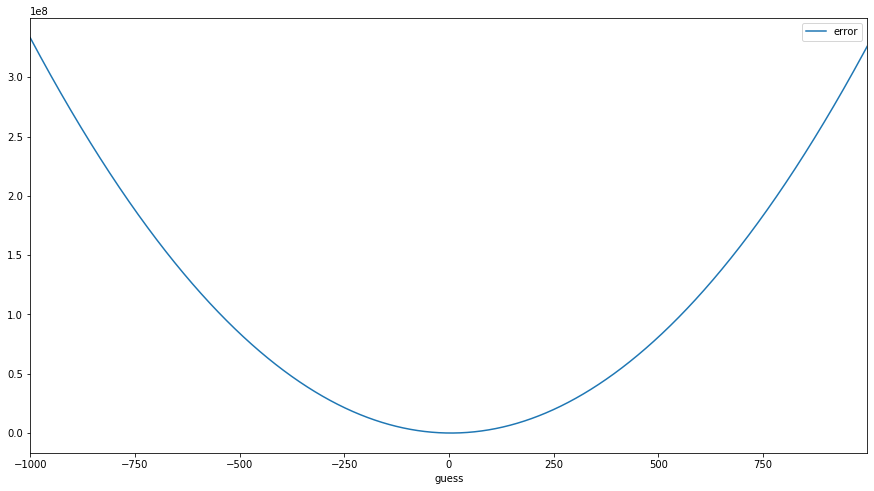

In [61]:
xs = [1, 2, 3, 4, 5, 6, 7, 50]
ys = [5.2, 10.2, 15.05, 20.1, 25.9, 30.07, 35.5, 250.3]

best_guess, best_error, guesses = opt_hill_climb_int_data(xs, ys, return_intermediate_vals=True)

print(best_guess, best_error, len(guesses))
pd.DataFrame(guesses, columns=["guess", "error"]).plot.line(x="guess", y="error",figsize=figs)

In [56]:
%timeit opt_hill_climb_int_data(xs, ys)
%timeit opt_hill_climb_int(lambda x: x * 5, 251)

4.06 ms ± 209 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
603 µs ± 6.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


**Exercise** The version of hill climber, which operates on data is slower than the one which operates on a single equation. Why is it slower? (hint: how many loops are there in both functions and are they parallel or nested?)

**Exercise** Use an online diff tool to visually compare how the two functions differ

### Non-integer answers

We have just solved `251 = 5 * x` and learned a great deal about searching for solutions. Let's remove the requirement that `x` be an integer. We will still disallow arbitrary precision (in other words, we will limit values to 2 decimal places). Let's see how the solution changes:

In [48]:
def opt_hill_climb(equation, target, increment_by = .1, guess_min=-1000, guess_max=1000, return_intermediate_vals=False):
    best_error = None
    best_guess = None
    
    guesses_errors = list() # store errors and guesses to visualize

    g = guess_min
    while g >= guess_min and g <= guess_max:
        result = equation(g)
        error  = abs(target - result)
        
        guesses_errors.append((g, error)) # store errors and guesses to visualize
        g += increment_by 
        
        if best_guess is None or error < best_error:
            best_guess = g
            best_error = error
    if return_intermediate_vals:
        return best_guess, best_error, guesses_errors
    else:
        return best_guess, best_error, None

50.300000000159315 7.965752502059331e-10 20000


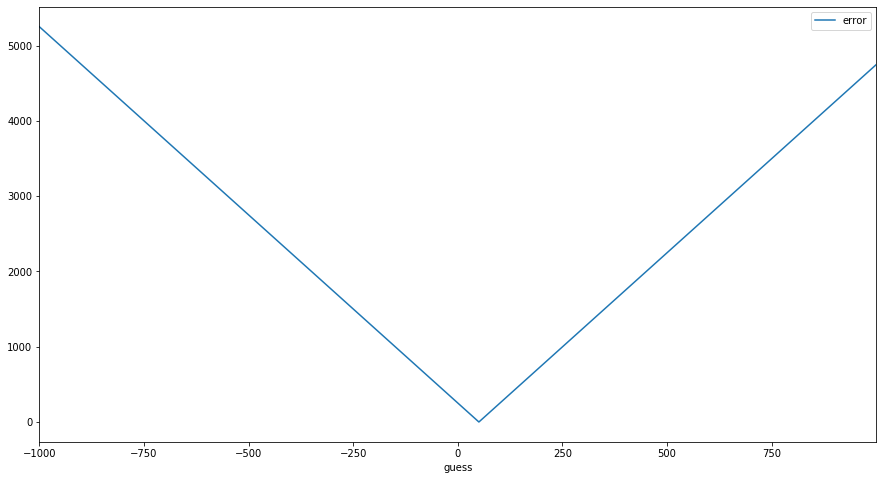

In [50]:
best_guess, best_error, guesses = opt_hill_climb(lambda x: x * 5, 251, return_intermediate_vals=True)

print(best_guess, best_error, len(guesses))
pd.DataFrame(guesses, columns=["guess", "error"]).plot.line(x="guess", y="error",figsize=figs)

In [57]:
%timeit opt_hill_climb_int(lambda x: x * 5, 251)
%timeit opt_hill_climb_int_data(xs, ys)
%timeit opt_hill_climb(lambda x: x * 5, 251)

4.18 ms ± 128 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
640 µs ± 38.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
8 ms ± 422 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**Exercise** Use an online _diff_ checker to visualize the difference between the integer and float versions of the hill-climbing algorithm

**Extended Exercise** Combine the version of hill climber which operates on data instead of equations and the version which operates on decimal guesses. Test it by running on the data provided above (`xs` and `ys`) and limit `guess_min` to -10 and `guess_max` to 10 (to reduce the amount of time needed to search for a solution.

**Exercise** How does the performance of the above function compare to the first version of hill climber? Why is the performance so different? (hint: describe in terms of loops)

#### The story so far
We started looking at _solving_ an equation.

We quickly switched to a more realistic scenario where we have to find the best answer (because an exact answer doesn't exist).

We then went from a solution which finds the optimal answer to a single equation to one which finds the optimal answer when we have a dataset (multiple input/output pairs).

In all scenarios above, we used integer solutions. The most recent example switched to a decimal answer.

Let's go back to the integer solution (just because it is easier to understand) and see what happens if we need to guess two parameters:

~~Notice that in all scenarios above, we are simply going from some minimum guess to the maximum guess. Let's look at a more intelligent solution.~~

~~The code below starts with a guess, then either increments or decrements, depending on which gets us lower error~~

TODO: Continue on to gradient descent